# Plotting a Decision Tree
<div class="alert alert-block alert-info">
<b>Content:</b> In this notebook, we fit and plot a decision tree. We also analyze an inpure leaf.
</div>


In [1]:
from sklearn import datasets, tree
import numpy as np

iris = datasets.load_iris()
raw_data = iris.data
target = iris.target
data=raw_data[:,[2,3]]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, target)

[Text(0.5, 0.9166666666666666, 'x[1] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4090909090909091, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.4545454545454546, 0.8333333333333333, 'True  '),
 Text(0.5909090909090909, 0.75, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5454545454545454, 0.8333333333333333, '  False'),
 Text(0.36363636363636365, 0.5833333333333334, 'x[0] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.18181818181818182, 0.4166666666666667, 'x[1] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.2727272727272727, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5454545454545454, 0.4166666666666667, 'x[1] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.45454545454545453, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.6363636363636364, 0.25, 'x[

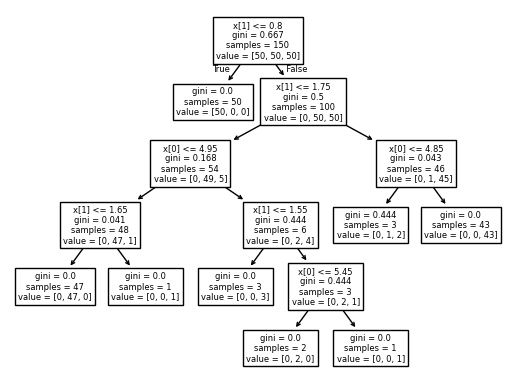

In [2]:
tree.plot_tree(clf) 

For the next visualization you will need
Graphviz to be installed on your system as well as the modules graphviz and pydotplus in you Python environment.

In [9]:
import graphviz 
import collections

dot_data = tree.export_graphviz(clf,
                                feature_names=iris.feature_names[2:4],
                                out_file=None,
                                filled=True,
                                rounded=True)

graph = graphviz.Source(dot_data) #colors = ('dodgerblue', 'darkorange', 'lightgreen', 'white')
graph.format='pdf'
graph.render("results/iris_23_decision_tree_graphiz")
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [6]:
from classification_viz import plot_decisions_2d
import matplotlib.pyplot as plt
plot_decisions_2d(data, target, clf)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
# adapt the path or create a subfolder results
plt.savefig("results/iris_23_decision_tree_quadrangles.pdf")

ModuleNotFoundError: No module named 'classification_viz'

# Investigation of the Impure Leaf
The decision tree has one node that is not pure, but that is also not further split. Why is that?
Theoretically, the node could have been split further using a new condition on the features. 

Explanation: There are no possible feature-based splits that actually split. In other words, the instances in the node share the same features, but belong to different classes.

Let's confirm that and find the respective points

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data, columns=iris.feature_names[2:4])
df.head()

In [ ]:
df.shape

Let's use the descriptive property of the descision tree to locate the three elements in the respective leaf:

In [ ]:
leaf_df=df[
    (df['petal length (cm)']>2.45) & 
    (df['petal width (cm)']>1.75) &
    (df['petal length (cm)']<=4.85)
]
leaf_df

In [ ]:
iris.target[leaf_df.index]

We observe: the three instances (70, 126, 138) share the same features but 70 belongs to class 1, the others to class 2.

<div class="alert alert-block alert-info">
<b>Take Aways:</b> 

* Howto plot a decision tree.
* Investigating an inpure leaf.
* Demonstration of the explanation-awareness of the approach.
</div>